In [1]:
import pandas as pd


In [2]:
ratings_df = pd.read_csv("../data/processed/ratings_final.csv")
books_df = pd.read_csv("../data/processed/books_final.csv")

In [3]:
book_rating_counts = ratings_df.groupby("ISBN")["Rating"].count().reset_index()
book_rating_counts.columns = ["ISBN", "RatingCount"]

In [4]:
book_rating_avg = ratings_df.groupby("ISBN")["Rating"].mean().reset_index()
book_rating_avg.columns = ["ISBN", "RatingAvg"]

In [5]:
popularity_df = pd.merge(book_rating_counts, book_rating_avg, on="ISBN")


In [6]:
popularity_df = pd.merge(popularity_df, books_df[["ISBN", "Title", "Author"]], on="ISBN", how="left")

In [7]:
top_by_count = popularity_df.sort_values("RatingCount", ascending=False).head(20)

In [8]:
top_by_avg = popularity_df[popularity_df["RatingCount"] >= 20]
top_by_avg = top_by_avg.sort_values("RatingAvg", ascending=False).head(20)

In [9]:
print("Most Rated Books")
display(top_by_count)

print("Most Popular Books by Average Rating (20+ ratings)")
display(top_by_avg)

Most Rated Books


,ISBN,RatingCount,RatingAvg,Title,Author
13616,0971880107,1352,0.692308,Wild Animus,Rich Shapero
2064,0316666343,848,3.836085,The Lovely Bones: A Novel,Alice Sebold
4725,0385504209,626,4.271565,The Da Vinci Code,Dan Brown
403,0060928336,525,2.824762,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells
1611,0312195516,485,3.764948,The Red Tent (Bestselling Backlist),Anita Diamant
1394,0142001740,462,3.720779,The Secret Life of Bees,Sue Monk Kidd
11519,067976402X,445,2.653933,Snow Falling on Cedars,David Guterson
10458,0671027360,439,3.384966,Angels & Demons,Dan Brown
5974,044021145X,436,2.834862,The Firm,John Grisham
6003,0440214041,426,2.169014,The Pelican Brief,John Grisham


Most Popular Books by Average Rating (20+ ratings)


,ISBN,RatingCount,RatingAvg,Title,Author
214,0060256672,27,7.407407,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein
9152,0553274325,23,7.304348,Johnny Got His Gun,Dalton Trumbo
4936,0395177111,21,6.904762,The Hobbit (Leatherette Collector's Edition),J. R. R. Tolkien
211,0060248025,34,6.705882,Falling Up,Shel Silverstein
5756,0439136350,162,6.604938,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
5744,0439064864,153,6.601307,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
5759,0439139597,156,6.564103,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
13162,0836218787,32,6.500000,Scientific Progress Goes 'Boink': A Calvin an...,Bill Watterson
13178,0836221362,25,6.440000,It's A Magical World: A Calvin and Hobbes Coll...,Bill Watterson
9852,0590353403,137,6.386861,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling


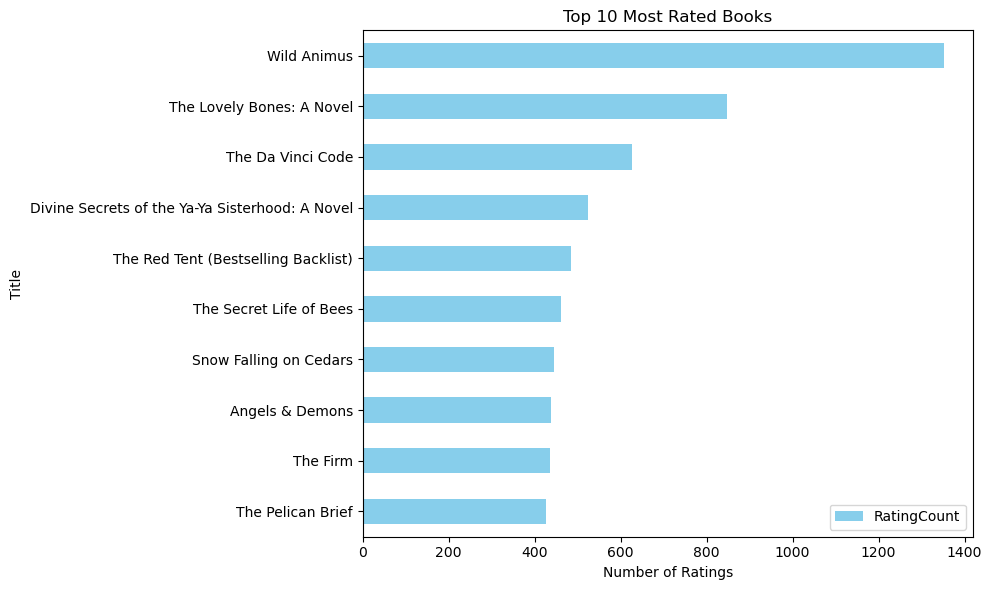

In [10]:
import matplotlib.pyplot as plt

top_by_count.head(10).plot(
    x="Title", y="RatingCount", kind="barh", figsize=(10, 6), color="skyblue"
)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

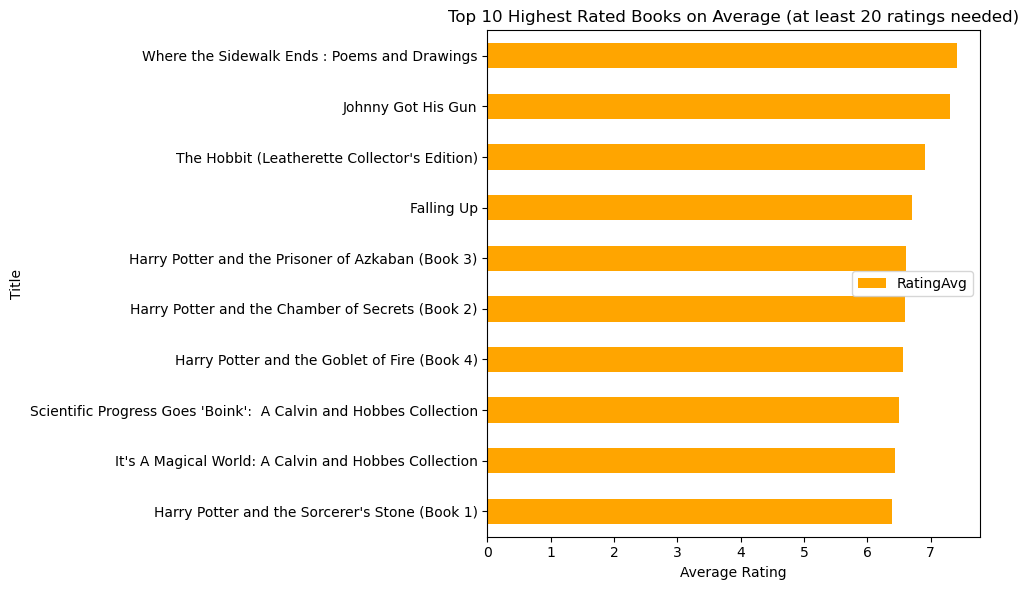

In [11]:
top_by_avg.head(10).plot(
    x="Title", y="RatingAvg", kind="barh", figsize=(10, 6), color="orange"
)
plt.title("Top 10 Highest Rated Books on Average (at least 20 ratings needed)")
plt.xlabel("Average Rating")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
top_by_count.to_csv("../outputs/top_books_by_count.csv", index=False)
top_by_avg.to_csv("../outputs/top_books_by_avg.csv", index=False)

## Baseline Recommendation System – Default Suggestions

This notebook implements a popularity-based baseline recommender system that does not provide personalized predictions.

### Purpose:
- Serve as a reference point before applying more complex recommendation models
- Offer fallback suggestions in cold-start scenarios (e.g., for new users or users with no activity)

### Two types of lists have been created:
1. **Top-N Most Rated Books**
   - Books are ranked by the total number of user ratings they have received.
   - This list reflects the impact of social proof and general popularity.
   - It is a safe default recommendation for new users.

2. **Top-N Highest Rated Books (with at least 20 ratings)**
   - Books are sorted by their average rating.
   - A minimum threshold of 20 ratings is applied to avoid bias from books with very few high ratings.
   - This list reflects overall user satisfaction.

### Application:
These lists can be used to:
- Populate recommendation sections for new or inactive users
- Serve as "Top Picks" or "Popular Now" sections on the main interface

### Next Step:
This baseline will serve as a benchmark to compare against collaborative filtering models developed in the next notebook (`02_collaborative_filtering.ipynb`).
